# PROCESO COMPLETO DEL DESARROLLO DE UN PROYECTO DE MACHINE LEARNING:
## 1º Hago la carga de los datos desde un archivo CSV con Pandas para crear el DF y poder trabajar en Python

In [1]:
# Lo primero que hago es importar pandas para trabajar con los datos.
import pandas as pd 

# Creo un objeto que llamaré df donde con la función de pandas read.csv le indico la ruta del archivo.
df = pd.read_csv(r"C:\Users\javie\Downloads\bank_dataset.CSV")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39.0,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32.0,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43.0,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


## 2º Para poder estar seguro de los datos que seleccionaré para mi modelo procedo a:
* Creo una matríz de correlación para ver la misma en las variables numéricas.
* Para ayudarme a entender la correlación hago un Heat Map y así de maneera gráfica interpretar las correlaciones.

Matriz de correlación:
               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.112217 -0.000418  0.000139 -0.005358  0.002593  0.020060
balance   0.112217  1.000000  0.010467  0.022436 -0.013894  0.017411  0.030805
day      -0.000418  0.010467  1.000000 -0.018511  0.137007 -0.077232 -0.058981
duration  0.000139  0.022436 -0.018511  1.000000 -0.041557 -0.027392 -0.026716
campaign -0.005358 -0.013894  0.137007 -0.041557  1.000000 -0.102726 -0.049699
pdays     0.002593  0.017411 -0.077232 -0.027392 -0.102726  1.000000  0.507272
previous  0.020060  0.030805 -0.058981 -0.026716 -0.049699  0.507272  1.000000


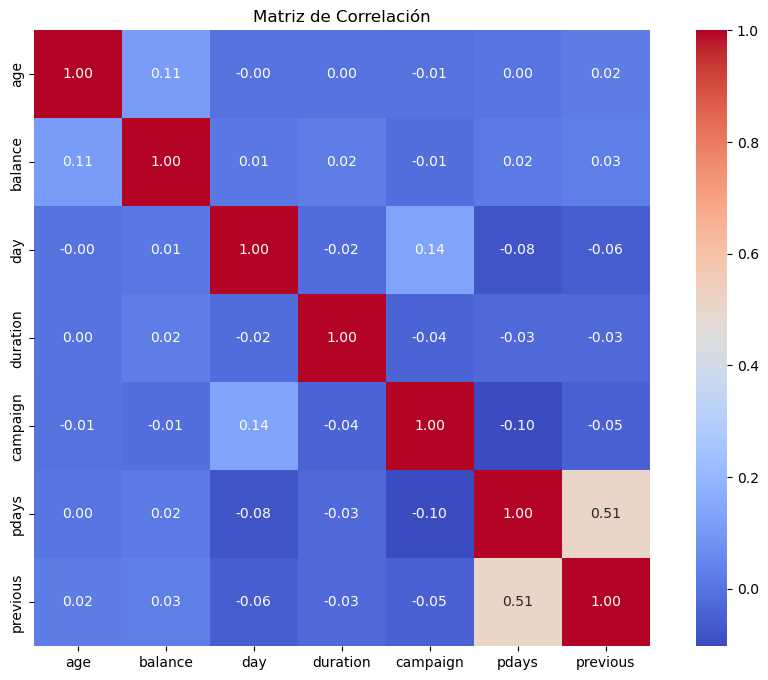

In [2]:
# Seleccionar solo las columnas numéricas
import matplotlib.pyplot as plt 
import seaborn as sns
numerical_df = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numerical_df.corr()

# Imprimir la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Matriz de Correlación')
plt.show()

## 3º Ahora que ya vi la correlación y los datos del DF selecciono las variables con las que trabajaré en el modelo.
* En un primer momento estaba considerando trabajar únicamente con las variables que aportaban información demográfica y financiera pero despues de ver el Heat Map decido también incluir pdays y previous que son las que tienen la correlación más elevada.
* Copio el codigo que tenía al inicio para efectuar la carga del archivo pero esta vez creo un Df en base a una lista con las columnas que utilizaré.

In [3]:
# Lo primero que hago es importar pandas para trabajar con los datos.
import pandas as pd 

# Creo un objeto que llamaré df donde con la función de pandas read.csv le indico la ruta del archivo.
df = pd.read_csv(r"C:\Users\javie\Downloads\bank_dataset.CSV")

# Indico las columnas que contienen los datos que quiero seleccionar.
df = df[['age','job','marital','education','default','balance','housing','loan','deposit','pdays','previous']]

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   deposit    11162 non-null  object 
 9   pdays      11162 non-null  int64  
 10  previous   11162 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 959.4+ KB


## 4º Hago uns búsqueda de los valores nulos en mi DF para posteriormente poder tratarlos.

In [4]:
# Cuento los valores nulos en cada columna.
df.isnull().sum()

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
deposit       0
pdays         0
previous      0
dtype: int64

* Hago la imputación de los valores nulos siguiendo los critérios que se especifican en las lineas de comentario del código.
* Finalmente vuelvo a hacer una búsqueda de valores nulos para comprobar que esta vez sea 0.

In [5]:
# Sustituyo los nulos de la edad por su moda teniendo en cuenta los campos de job, marital y education ajustando los perfiles de coincidencia 
mediana_age = df.groupby(["job", "marital", "education"])["age"].transform(lambda x: x.median() if not x.isnull().all() else x.median())
df["age"] = df["age"].fillna(mediana_age.round())

# Sustituyo los nulos de marital con la moda de los registros teniendo en cuenta la edad y el trabajo para ajustar un poco más la coincidencia
moda_marital = df.groupby(["job", "age"])["marital"].transform(lambda x: x.mode()[0] if not x.isnull().all() else None)
df["marital"] = df["marital"].fillna(moda_marital)

# Sustituyo los nulos de education con la moda de los registros que tengan la misma edad y trabajo para ajustar la coincidencia
moda_education = df.groupby(["job", "age"])["education"].transform(lambda x: x.mode().iloc[0] if not x.isnull().all() else None)
df["education"] = df["education"].fillna(moda_education)

# Vuelvo a contar los valores nulos para comprobar de que han sido sustituidos
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
deposit      0
pdays        0
previous     0
dtype: int64

## 5º Tratamiento de outliers.  
* Hago una búsqueda de los outliers en las variables numéricas del DF.

Outliers detectados en 'age':
1162     75.0
1236     85.0
1243     90.0
1274     85.0
1320     83.0
         ... 
10438    77.0
10562    88.0
10570    77.0
10618    78.0
10843    86.0
Name: age, Length: 171, dtype: float64


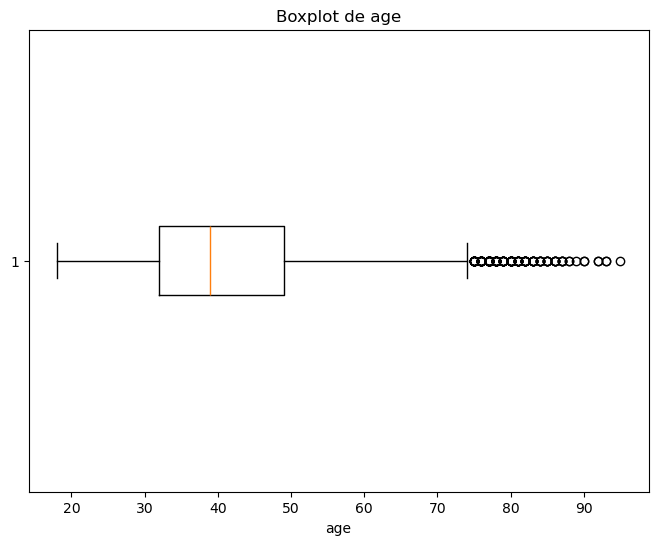

Outliers detectados en 'balance':
9         5090
60        7180
61        5291
69        4580
71       10576
         ...  
11073     6718
11077     6102
11085     4243
11086     6445
11101     6242
Name: balance, Length: 1055, dtype: int64


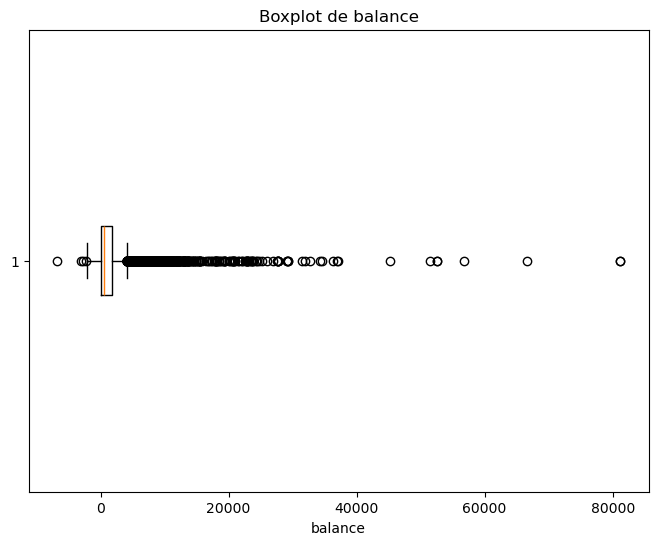

Outliers detectados en 'pdays':
890      166
891       91
899      147
933      170
951      150
        ... 
11125    362
11133    260
11145    271
11155    172
11160    172
Name: pdays, Length: 2750, dtype: int64


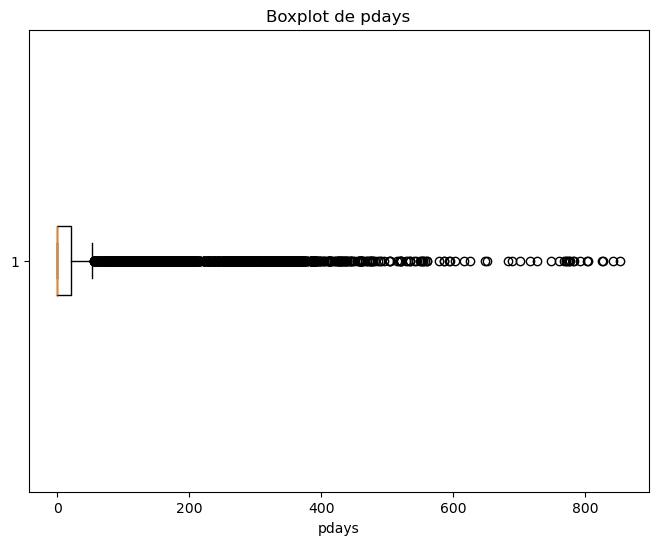

Outliers detectados en 'previous':
891       4
933       3
952       4
968       3
1007     10
         ..
11092     4
11125     3
11133     5
11145     4
11160     5
Name: previous, Length: 1258, dtype: int64


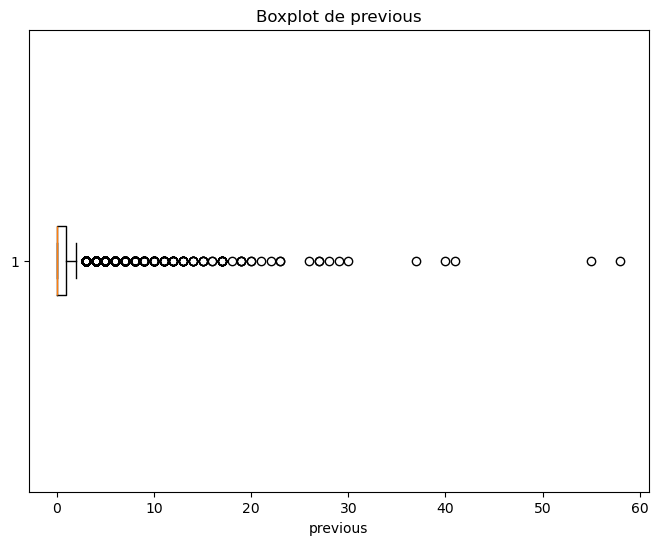

In [6]:
import numpy as np
# Selecciono solo las columnas numéricas del DataFrame
columnas_numericas = df.select_dtypes(include=[np.number]).columns

# Bucle for para detectar outliers y crear un boxplot para cada columna numérica
for columna in columnas_numericas:
    # Cálculo de los límites de outliers usando el IQR
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Filtrado de los outliers
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)][columna]
    print(f"Outliers detectados en '{columna}':")
    print(outliers)
    
    # Creación del boxplot para cada columna 
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[columna], vert=False)
    plt.title(f'Boxplot de {columna}')
    plt.xlabel(columna)
    plt.show()


## Trato los Outliers del DF con Winsorize 
* Para no afectar al DF original hago un df_copy que será con el que trabajaré a partir de este bloque.

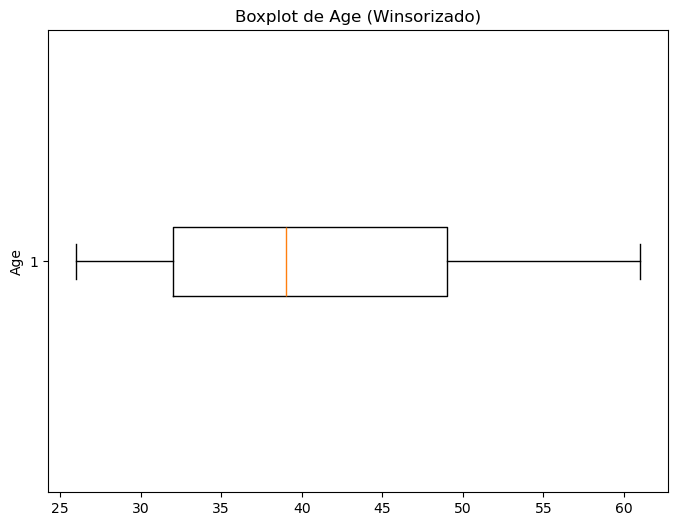

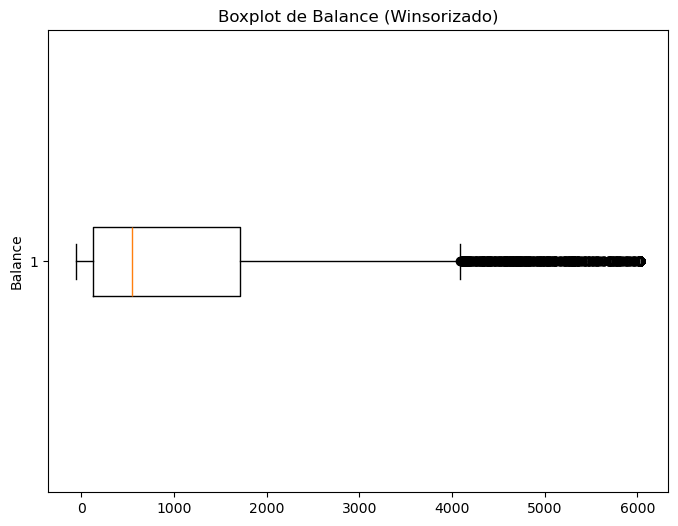

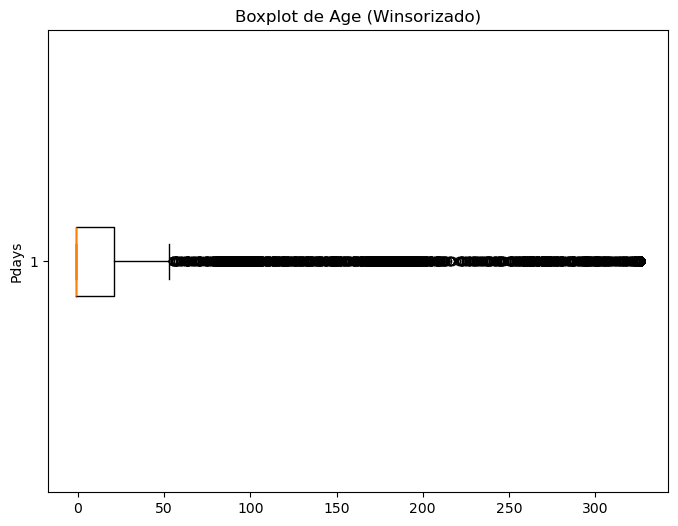

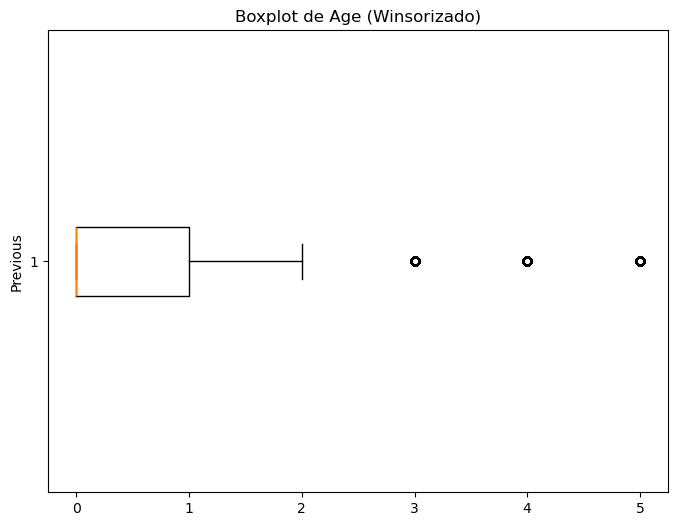

In [7]:
# Importo matplotlib para la gráfica y winsorize para tratar los outliers.
import matplotlib.pyplot as plt 
from scipy.stats.mstats import winsorize

# Creo una copia del DataFrame para evitar modificar el original
df_copy = df.copy()

# Reemplazo los valores extremos en las columnas 'age' y 'balance' por los valores de los percentiles 5 y 95.
df_copy['age'] = winsorize(df_copy['age'], limits=[0.05, 0.05])  # Limita los valores fuera de los percentiles 5-95
df_copy['balance'] = winsorize(df_copy['balance'], limits=[0.05, 0.05])  # Limita los valores fuera de los percentiles 5-95
df_copy['pdays'] = winsorize(df_copy['pdays'], limits=[0.05, 0.05])  # Limita los valores fuera de los percentiles 5-95
df_copy['previous'] = winsorize(df_copy['previous'], limits=[0.05, 0.05])  # Limita los valores fuera de los percentiles 5-95

# Creación del boxplot de la columna 'age' en el DataFrame winsorizado
plt.figure(figsize=(8, 6))
plt.boxplot(df_copy['age'], vert=False)
plt.title('Boxplot de Age (Winsorizado)')
plt.ylabel('Age')
plt.show()

# Creación del boxplot de la columna 'balance' en el DataFrame winsorizado
plt.figure(figsize=(8, 6))
plt.boxplot(df_copy['balance'], vert=False)
plt.title('Boxplot de Balance (Winsorizado)')
plt.ylabel('Balance')
plt.show()

# Creación del boxplot de la columna 'age' en el DataFrame winsorizado
plt.figure(figsize=(8, 6))
plt.boxplot(df_copy['pdays'], vert=False)
plt.title('Boxplot de Age (Winsorizado)')
plt.ylabel('Pdays')
plt.show()

# Creación del boxplot de la columna 'age' en el DataFrame winsorizado
plt.figure(figsize=(8, 6))
plt.boxplot(df_copy['previous'], vert=False)
plt.title('Boxplot de Age (Winsorizado)')
plt.ylabel('Previous')
plt.show()


## 6º División del conjunto de datos:
* La división la he realizado con un 80% de los datos para train (8,929 registros) y un 20% para test (2,233 registros). Considero esta proporción adecuada para un dataset de este tamaño, ya que permite entrenar el modelo con una cantidad significativa de datos mientras se reserva un conjunto suficiente para evaluar su rendimiento.
* Para mi modelo el cual será de aprendizaje supervisado estoy seleccionando deposit como etiqueta .
* Creo los objetos X para las variables independientes y el objeto Y para las variables dependientes y utilizo estos objetos para segmentar los grupos de entrenamiento y de prueba.

In [9]:
# Importo train_test_split de sklearn para dividir los datos en conjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split

# Creo el objeto 'X' para las características y el objeto 'Y' para la etiqueta o variable objetivo.
X = df_copy.loc[:, ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan','pdays','previous']]
Y = df_copy.loc[:, ['deposit']]

# Realizo la separación de los datos en entrenamiento y prueba, utilizando el 20% para pruebas.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

# Imprimo la información sobre los conjuntos de entrenamiento y prueba.
print(f'Los datos de entrenamiento contienen {X_train.shape[0]} filas, {X_train.shape[1]} características y {Y_train.shape[1]} etiquetas.')
print(f'Los datos de prueba contienen {X_test.shape[0]} filas, {X_test.shape[1]} características y {Y_test.shape[1]} etiquetas.')


Los datos de entrenamiento contienen 8929 filas, 10 características y 1 etiquetas.
Los datos de prueba contienen 2233 filas, 10 características y 1 etiquetas.


## 7º Codificación de variables Categóricas:
* Busco las categorias en el df_copy


In [46]:
# Itero sobre las columnas del DataFrame que tienen tipo de dato 'object' (categóricas).
for column in df_copy.select_dtypes(include=['object']).columns:
    
    # Imprimo el nombre de la variable, su número total de categorías y la distribución de los valores.
    print(f"La variable {column.upper()} tiene un total de {df_copy[column].nunique()} categorías \
    \n{df_copy[column].value_counts()}\
    \n \n------------------------\n")


La variable JOB tiene un total de 12 categorías     
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64    
 
------------------------

La variable MARITAL tiene un total de 3 categorías     
marital
married     6353
single      3518
divorced    1291
Name: count, dtype: int64    
 
------------------------

La variable EDUCATION tiene un total de 4 categorías     
education
secondary    5479
tertiary     3687
primary      1500
unknown       496
Name: count, dtype: int64    
 
------------------------

La variable DEFAULT tiene un total de 2 categorías     
default
no     10994
yes      168
Name: count, dtype: int64    
 
------------------------

La variable HOUSING tiene un total de 2 categorías     
housing
no     5881
yes    5281
Name: count, d

* Ejecuto Label Encoding para las características default, loan y housing ya que son características binarias ( yes/no)

In [11]:
# Defino las variables binarias
binary_variable = ['default', 'loan', 'housing']

# Convierto las características binarias en 0 y 1 usando map, tanto de datos de entrenamiento como de prueba
for variable in binary_variable:
    X_train[variable] = X_train[variable].map({'no': 0, 'yes': 1}).astype(int)
    X_test[variable] = X_test[variable].map({'no': 0, 'yes': 1}).astype(int)

# Convierto la etiqueta 'deposit' en 0 y 1, tanto de datos de entrenamiento como de prueba
Y_train['deposit'] = Y_train['deposit'].map({'no': 0, 'yes': 1}).astype(int)
Y_test['deposit'] = Y_test['deposit'].map({'no': 0, 'yes': 1}).astype(int)


* Procedo a hacer Label Encoding a education ya que es una variable ordinal

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Creo un objeto LabelEncoder
le = LabelEncoder()

# Ajustar y transformar la columna 'education'
X_train['education'] = le.fit_transform(X_train['education'])
X_test['education'] = le.fit_transform(X_test['education'])


print(X_train)

        age          job   marital  education  default  balance  housing  \
2536   60.0      retired   married          3        0      209        0   
8283   51.0   management   married          0        0     6027        1   
10439  58.0      retired  divorced          1        0        0        0   
2809   61.0      retired   married          0        0     6027        0   
5590   37.0   management    single          3        0      715        1   
...     ...          ...       ...        ...      ...      ...      ...   
7666   47.0   technician   married          2        0      545        1   
10894  32.0   management    single          2        0     6027        0   
9523   46.0   management    single          1        0      244        1   
5303   33.0   technician   married          1        0     2362        1   
1033   52.0  blue-collar   married          1        0     6027        0   

       loan  pdays  previous  
2536      0    106         1  
8283      0     -1       

* Hago agrupación de categorías de 'job' antes del One Hot Encoding

In [48]:
import pandas as pd

mapping = {
    'management': 'office',
    'admin.': 'office',
    'blue-collar': 'blue-collar',
    'technician': 'blue-collar',
    'services': 'service',
    'self-employed': 'self-employed',
    'student': 'student',
    'unemployed': 'unemployed',
    'entrepreneur': 'self-employed',
    'housemaid': 'service',
    'unknown': 'other'
}

# Aplicamos el mapeo a la columna 'job' 
X_train['job'] = X_train['job'].map(mapping)
X_test['job'] = X_test['job'].map(mapping)

print(df)

        age          job  marital  education default  balance housing loan  \
0      59.0       admin.  married  secondary      no     2343     yes   no   
1      56.0       admin.  married  secondary      no       45      no   no   
2      41.0   technician  married  secondary      no     1270     yes   no   
3      55.0     services  married  secondary      no     2476     yes   no   
4      54.0       admin.  married   tertiary      no      184      no   no   
...     ...          ...      ...        ...     ...      ...     ...  ...   
11157  33.0  blue-collar   single    primary      no        1     yes   no   
11158  39.0     services  married  secondary      no      733      no   no   
11159  32.0   technician   single  secondary      no       29      no   no   
11160  43.0   technician  married  secondary      no        0      no  yes   
11161  34.0   technician  married  secondary      no        0      no   no   

      deposit  pdays  previous  
0         yes     -1         0

* Ejecuto One Hot Encoding
* A partir de este bloque trabajaré con los objetos **encoded_X_train** y **encoded_X_test**.

In [50]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Copia los datos de entrenamiento y prueba
encoded_X_train = X_train.copy()
encoded_X_test = X_test.copy()

# Defino las variables categóricas para One-Hot Encoding
encoding_variable = ['job', 'marital']

# Inicializo el encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Realizo el One-Hot Encoding de los datos de entrenamiento y prueba
for variable in encoding_variable:
    # Primero ajustamos el encoder con los datos de entrenamiento
    encoded_train_results = encoder.fit_transform(X_train[encoding_variable])
    encoded_train_columns = pd.DataFrame(encoded_train_results, 
                                     columns=encoder.get_feature_names_out(encoding_variable), 
                                     index=X_train.index)

    # Luego transformamos los datos de prueba
    encoded_test_results = encoder.transform(X_test[encoding_variable])
    encoded_test_columns = pd.DataFrame(encoded_test_results, 
                                    columns=encoder.get_feature_names_out(encoding_variable), 
                                    index=X_test.index)

# Unir ambas
encoded_X_train = pd.concat([encoded_X_train, encoded_train_columns], axis="columns")
encoded_X_test = pd.concat([encoded_X_test, encoded_test_columns], axis="columns")


# Elimino las columnas originales categóricas de X_train y X_test
encoded_X_train = encoded_X_train.drop(columns=encoding_variable)
encoded_X_test = encoded_X_test.drop(columns=encoding_variable)

# Imprimo los primeros registros de los datos procesados
print("\nEjemplo de datos de entrenamiento después de One-Hot Encoding:")
encoded_X_train.head()





Ejemplo de datos de entrenamiento después de One-Hot Encoding:


,age,education,default,balance,housing,loan,pdays,previous,job_self-employed,job_student,job_unemployed,job_nan,marital_married,marital_single
2536,60.0,3,0,209,0,0,106,1,0.0,0.0,0.0,1.0,1.0,0.0
8283,51.0,0,0,6027,1,0,-1,0,0.0,0.0,0.0,1.0,1.0,0.0
10439,58.0,1,0,0,0,0,-1,0,0.0,0.0,0.0,1.0,0.0,0.0
2809,61.0,0,0,6027,0,0,107,1,0.0,0.0,0.0,1.0,1.0,0.0
5590,37.0,3,0,715,1,0,-1,0,0.0,0.0,0.0,1.0,0.0,1.0


In [83]:
print("Ejemplo de datos de prueba después de One-Hot Encoding:")
encoded_X_test.head()

Ejemplo de datos de prueba después de One-Hot Encoding:


,age,education,default,balance,housing,loan,pdays,previous,job_self-employed,job_student,job_unemployed,job_nan,marital_married,marital_single
7511,34.0,1,0,-55,1,0,-1,0,0.0,0.0,0.0,1.0,1.0,0.0
6654,33.0,1,0,17,1,0,326,1,0.0,0.0,0.0,1.0,1.0,0.0
10076,30.0,1,0,-55,1,1,-1,0,0.0,0.0,0.0,1.0,1.0,0.0
7711,28.0,0,0,426,1,0,-1,0,0.0,0.0,0.0,0.0,0.0,1.0
2938,61.0,1,0,1146,0,0,92,2,0.0,0.0,0.0,1.0,1.0,0.0


In [15]:
print(f'Los datos de entrenamiento contienen {encoded_X_train.shape[0]} filas, {encoded_X_train.shape[1]} características y {Y_train.shape[1]} etiqueta.')
print(f'Los datos de prueba contienen {encoded_X_test.shape[0]} filas, {encoded_X_test.shape[1]} características y {Y_test.shape[1]} etiqueta.')


Los datos de entrenamiento contienen 8929 filas, 17 características y 1 etiqueta.
Los datos de prueba contienen 2233 filas, 17 características y 1 etiqueta.


## 8º Estandarización de las Variables Numéricas:
He decidido utilizar StandardScaler para la estandarización de las variables numéricas. Este método transforma los datos para que tengan una media de 0 y una desviación estándar de 1, lo que es especialmente útil cuando las características tienen diferentes escalas y magnitudes. 


In [17]:
# Importo StandardScaler de sklearn.preprocessing para estandarizar las variables.
from sklearn.preprocessing import StandardScaler

# Identifico las columnas numéricas en los conjuntos codificados de entrenamiento y prueba.
numeric_columns = encoded_X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Creo el objeto escalador
scaler = StandardScaler()

# Aplico la estandarización en el conjunto de entrenamiento y luego en el de prueba
encoded_X_train[numeric_columns] = scaler.fit_transform(encoded_X_train[numeric_columns])
encoded_X_test[numeric_columns] = scaler.transform(encoded_X_test[numeric_columns])

# Visualizo los datos estandarizados en el conjunto de entrenamiento
encoded_X_train[numeric_columns].head()


,age,balance,pdays,previous,job_other,job_self-employed,job_service,job_student,job_unemployed,job_white-collar,job_nan,marital_married,marital_single
2536,1.823905,-0.634594,0.611175,0.243147,-0.080154,-0.269356,-0.347083,-0.181908,-0.183218,-0.731606,3.657653,0.866478,-0.675375
8283,0.968317,2.854287,-0.508431,-0.484664,-0.080154,-0.269356,-0.347083,-0.181908,-0.183218,1.366856,-0.273399,0.866478,-0.675375
10439,1.633774,-0.759925,-0.508431,-0.484664,-0.080154,-0.269356,-0.347083,-0.181908,-0.183218,-0.731606,3.657653,-1.154097,-0.675375
2809,1.918970,2.854287,0.621638,0.243147,-0.080154,-0.269356,-0.347083,-0.181908,-0.183218,-0.731606,3.657653,0.866478,-0.675375
5590,-0.362598,-0.331161,-0.508431,-0.484664,-0.080154,-0.269356,-0.347083,-0.181908,-0.183218,1.366856,-0.273399,-1.154097,1.480658


Explicación del Resultado: En Age tomando como referencia los registros: 2536, 8283, 10439 teníamos :
Edad (original): 60, 51, 58 
Edad (estandarizado): 1.82, 0.96, 1.63 
Los valores numéricos se centran y normalizan, asegurando que cada variable tenga una influencia similar en el modelo, por lo que se puede ver que el registro 8283 es el que se acerca más a la media porque está más próximo a 0 mientras que el registro 2536 con 1.82 es el que más se aleja.
TENIENDO EN CUENTA QUE SOLO ESTAMOS TOMANDO ESTOS 3 REGISTROS PARA ESTA EXPLICACIÓN DE LOS RESULTADOS.

## 9º Reviso la varianza por si alguna característica la tuviera muy baja para descartarla y así reducir ruido.

In [19]:
import pandas as pd

# Calculo la varianza de cada columna (característica)
varianza = cumulative_variance.var()

# Imprimo los resultados
print(varianza)

age                  1.323879e+03
education            1.099275e+07
default              1.606535e+03
balance              4.306283e+02
housing              1.453642e+06
loan                 1.084390e+05
pdays                8.107343e+02
previous             4.909794e+02
job_other            6.801886e+02
job_self-employed    1.901324e+03
job_service          4.463874e+02
job_student          6.537544e+02
job_unemployed       1.475442e+03
job_white-collar     1.435434e+03
job_nan              1.566765e+03
marital_married      5.732125e+02
marital_single       4.623025e+02
dtype: float64


* En este pundo me doy cuenta de que no tengo ninguna que esté por debajo del 1 así que confirmo que utilizo todas estas características como había pensado en un principio.

## 10º Paso a entrenar el modelo
* He decidido hacer dos modelos uno de **Regresión Logística** y un **Random Forest** para comparar los resultados y quedarme con el que me de mejor resultado.

## - Entrenamiento con modelo **Random Forest**

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Crear un modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(encoded_X_train, Y_train)

# Hago que el modelo efectúe predicciones
Y_pred = model.predict(encoded_X_test)

# Evaluo el modelo (usando accuracy)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

C:\Users\javie\anaconda3\envs\entorno_ML\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.6354679802955665


## - Entrenamiento con **Modelo de Clasificación**

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Creo un modelo de regresión logística
model = LogisticRegression()

# Entreno el modelo
model.fit(encoded_X_train, Y_train)

# Hago que el modelo efectúe predicciones
Y_pred = model.predict(encoded_X_test)

# Evaluo el modelo (usando accuracy)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6462158531124048


C:\Users\javie\anaconda3\envs\entorno_ML\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\javie\anaconda3\envs\entorno_ML\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* Depues de ver el desempeño de los modelos en los que he analizado la **exactitud** como métrica de evaluación para ambos me voy a quedar con el **Modelo de Clasificación** que es el que me da un resultado ligeramente mejor .

## 11º Evaluo el desempeño del modelo :
* Matríz de Confusión:

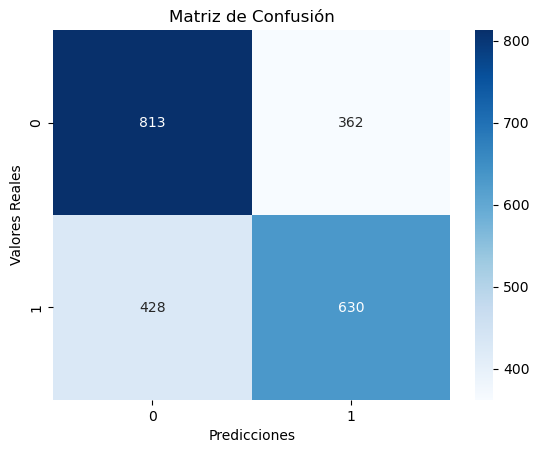

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(Y_test, Y_pred)

# Crear un heatmap para visualizar la matriz
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

* En este caso podemos ver que la matríz de confusión dice que el modelo ha detectado 813 verdaderos negativos y 630 verdaderos positivos.
* Esto equivale al 64.62% de exactitud en las predicciones que puede hacer el modelo.

* Precisión: El modelo ha clasificado correctamente aproximadamente el 64% de todas las instancias.

In [79]:
from sklearn.metrics import precision_score

precision = precision_score(Y_test, Y_pred)
print(precision)

0.6350806451612904


* Sensibilidad (Recall): Indica que el modelo tiene la capacidad de identificar correctamente cerca al 60% de los casos positivos.

In [80]:
from sklearn.metrics import recall_score

sensitivity = recall_score(Y_test, Y_pred)
print("Sensibilidad:", sensitivity)

Sensibilidad: 0.5954631379962193


* El F1-Score mide el equilibrio entre la precisión y el recall del modelo, ofreciendo una evaluación más completa de su rendimiento.

In [81]:
from sklearn.metrics import f1_score

f1 = f1_score(Y_test, Y_pred)
print("F1-score:", f1)

F1-score: 0.6146341463414634


## 12º Modificar Hiperparámetros para buscar rango de mejora.

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Definir el modelo base
model = LogisticRegression(max_iter=1000, random_state=42)

# Definir los hiperparámetros a ajustar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Mayor rango de regularización
    'penalty': ['l1', 'l2'],  # Considera solo penalizaciones prácticas
    'solver': ['liblinear', 'saga'],  # Solvers más comunes
    'max_iter': [100, 500, 1000]  # Iteraciones para optimización
}

# Configurar GridSearchCV con 10-Fold Cross-Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=10, verbose=2, n_jobs=-1)

# Ejecutar la búsqueda de hiperparámetros
grid_search.fit(encoded_X_train, Y_train)

# Obtener los mejores parámetros y resultados
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación (accuracy):", grid_search.best_score_)

# Evaluar el modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(encoded_X_test)

# Calcular la precisión en el conjunto de prueba
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy en test:", accuracy)


Fitting 10 folds for each of 84 candidates, totalling 840 fits
Mejores parámetros: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor puntuación (accuracy): 0.6511356389255746
Accuracy en test: 0.64576802507837


C:\Users\javie\anaconda3\envs\entorno_ML\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Veo que el modelo que había seleccionado que era el de Clasificación me daba un accuracy de 64.62% y si no interpreto mal el resultado del codigo modificando los hiperparámetros me da un accuracy de 64.57% y podría mejorar hasta un 65.11% lo cual es casi el mismo valor que el accuracy que había obtenido inicalmente con el modelo por lo que lo dejaré como estaba.

## 13º Ejecuto un codigo completo que me haga el entrenamiento del **Modelo de Clasificación** y que me lo evalúe con el accuracy.
* Además creo un DF con las características y sus coeficientes para poder hacer la interpretación final del proyecto.

C:\Users\javie\anaconda3\envs\entorno_ML\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\javie\anaconda3\envs\entorno_ML\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6462158531124048

Coeficientes del modelo:
              Feature  Coefficient
4             housing    -0.813674
5                loan    -0.525801
9         job_student     0.353569
7            previous     0.252491
12    marital_married    -0.212029
10     job_unemployed     0.176750
1           education     0.127790
8   job_self-employed    -0.127050
13     marital_single     0.092948
2             default    -0.058221
11            job_nan     0.038525
0                 age     0.001665
6               pdays     0.001031
3             balance     0.000115


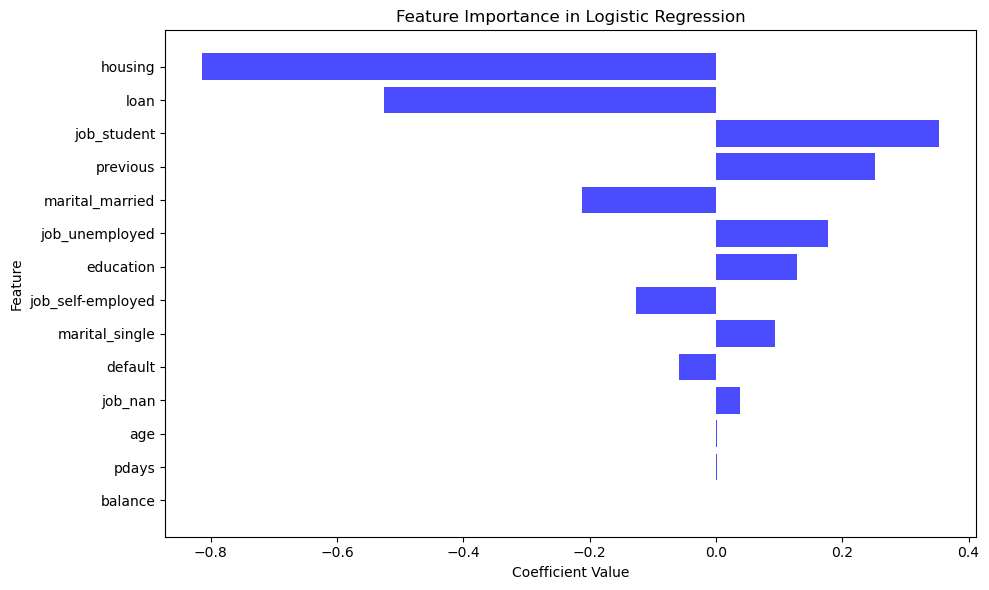

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Creo un modelo de regresión logística
model = LogisticRegression()

# Entreno el modelo
model.fit(encoded_X_train, Y_train)

# Hago que el modelo efectúe predicciones
Y_pred = model.predict(encoded_X_test)

# Evaluo el modelo (usando accuracy)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Obtener los coeficientes del modelo
coeficientes = model.coef_[0]  # Para regresión logística binaria

# Crear un DataFrame con las características y sus coeficientes
features = encoded_X_train.columns if hasattr(encoded_X_train, 'columns') else [f'feature_{i}' for i in range(encoded_X_train.shape[1])]
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coeficientes
})

# Ordenar por valor absoluto de los coeficientes (opcional, para mejor visualización)
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Imprimir los coeficientes
print("\nCoeficientes del modelo:")
print(coef_df)

# Visualizar los coeficientes
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='b', alpha=0.7)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()  # Invertir eje Y para mejor lectura
plt.tight_layout()
plt.show()


# **CONCLUSIONES**

Este proyecto fue diseñado para ayudar a la entidad bancaria a identificar estrategias efectivas para aumentar la contratación de depósitos a plazo. Después de analizar los datos de los clientes y desarrollar un modelo de Machine Learning, se obtuvieron los siguientes resultados y recomendaciones:

1. **Resultados clave del modelo:**
   - El modelo alcanzó una precisión (accuracy) del 64.62%, lo que sugiere un desempeño moderado. Aunque puede usarse para identificar patrones generales, no es lo suficientemente robusto para decisiones críticas sin un análisis adicional.
   - Los coeficientes del modelo indican que las características más influyentes son:
     - **Vivienda (housing):** Los clientes sin hipoteca tienen una mayor probabilidad de contratar el producto.
     - **Préstamos personales (loan):** Los clientes sin deudas también son más propensos a aceptar la oferta.
     - **Ocupación (job_student):** Los estudiantes representan un segmento favorable.
     - **Contactos previos (previous):** Un historial positivo de contactos incrementa las posibilidades de conversión.

2. **Recomendaciones para la entidad bancaria:**
   - **Segmentación por perfil financiero:** 
     - Dirigir la campaña a clientes que no tengan hipotecas o préstamos pendientes.
   - **Enfoque en estudiantes:** 
     - Establecer estrategias para captar estudiantes, quienes han mostrado una alta probabilidad de conversión.
   - **Contactos estratégicos:**
     - Priorizar clientes que no han sido contactados recientemente, ya que podrían ser más receptivos.
   - **Estrategias basadas en estado civil:**
     - Considerar el estado civil como un factor, ya que los solteros muestran mayor predisposición que los casados.

Estas conclusiones pueden servir como base para desarrollar un proyecto de marketing dirigido a estos segmentos clave, incrementando así las conversiones y mejorando el éxito del producto en el mercado.
